In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for charts
sns.set(style="whitegrid")
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [26]:
# Load the dataset
filename = 'student_feedback.csv'
df = pd.read_csv(filename)

# 1. Drop 'Student ID' as it's not needed
if 'Student ID' in df.columns:
    df = df.drop(columns=['Student ID'])

# 2. Drop any 'Unnamed' index columns that might have appeared
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 3. Remove rows with missing data
df.dropna(inplace=True)

# 4. Rename columns for cleaner charts
column_mapping = {
    'Well versed with the subject': 'Subject Knowledge',
    'Explains concepts in an understandable way': 'Clarity',
    'Use of presentations': 'Presentation Quality',
    'Degree of difficulty of assignments': 'Assignment Difficulty',
    'Solves doubts willingly': 'Supportiveness',
    'Structuring of the course': 'Course Structure',
    'Provides support for students going above and beyond': 'Mentorship',
    'Course recommendation based on relevance': 'Overall Relevance'
}
df.rename(columns=column_mapping, inplace=True)

print("✅ Data Cleaned & Ready!")
df.head()

✅ Data Cleaned & Ready!


,Subject Knowledge,Clarity,Presentation Quality,Assignment Difficulty,Supportiveness,Course Structure,Mentorship,Overall Relevance
0,5,2,7,6,9,2,1,8
1,6,5,8,6,2,1,2,9
2,7,7,6,5,4,2,3,1
3,9,6,7,1,5,9,4,6
4,8,10,8,4,6,6,9,9


In [27]:
# Calculate the average rating for each category (sorted)
mean_ratings = df.mean().sort_values()

# Display the sorted ratings
print("📊 Average Ratings (Lowest to Highest):")
print(mean_ratings)

📊 Average Ratings (Lowest to Highest):
Assignment Difficulty    5.430569
Supportiveness           5.474525
Overall Relevance        5.598402
Course Structure         5.636364
Mentorship               5.662338
Presentation Quality     5.942058
Clarity                  6.081918
Subject Knowledge        7.497502
dtype: float64


/tmp/ipython-input-4059837113.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_ratings.values, y=mean_ratings.index, palette='viridis')


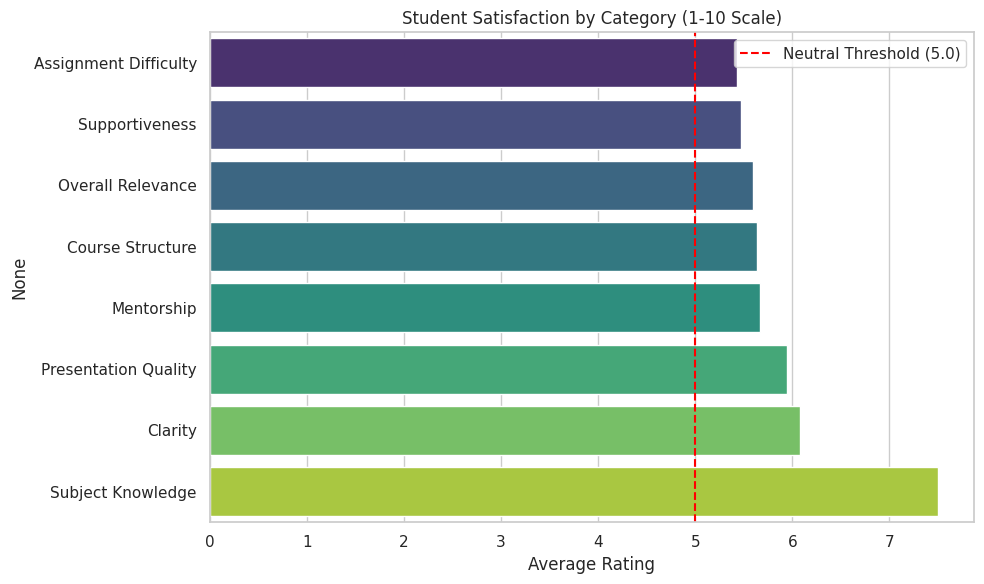

In [28]:
plt.figure(figsize=(10, 6))

# Create Bar Plot
sns.barplot(x=mean_ratings.values, y=mean_ratings.index, palette='viridis')

# Add labels and lines
plt.title('Student Satisfaction by Category (1-10 Scale)')
plt.xlabel('Average Rating')
plt.axvline(x=5, color='red', linestyle='--', label='Neutral Threshold (5.0)')
plt.legend()
plt.tight_layout()
plt.show()

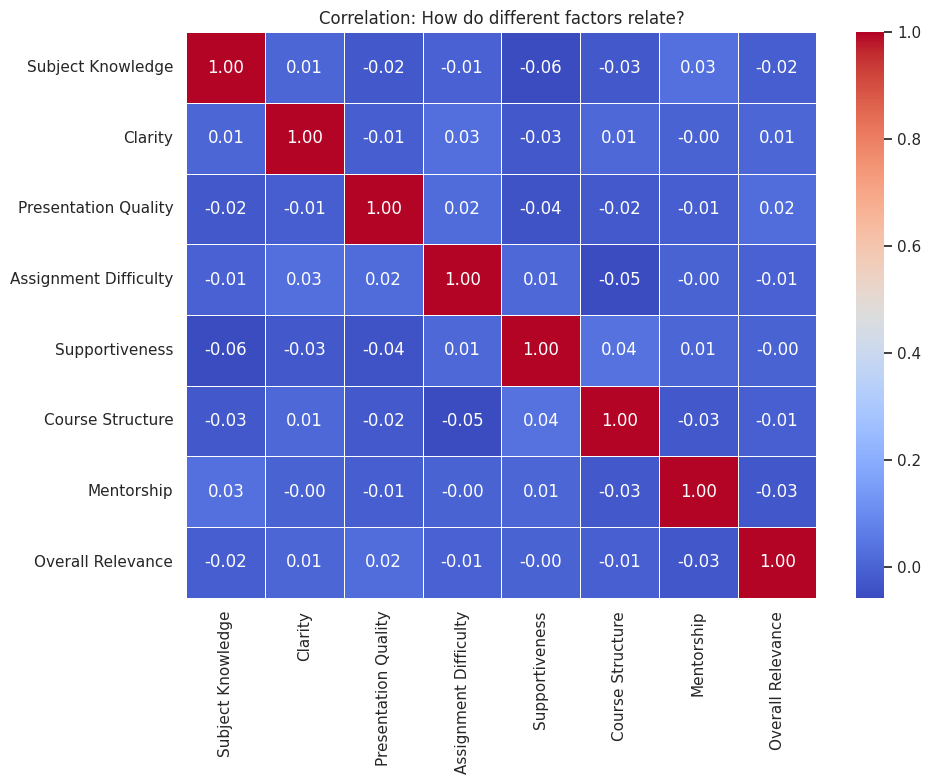

In [29]:
plt.figure(figsize=(10, 8))

# Calculate correlation matrix
corr_matrix = df.corr()

# Draw Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation: How do different factors relate?')
plt.tight_layout()
plt.show()

In [30]:
print("="*40)
print("📋 FINAL PROJECT REPORT")
print("="*40)

# Identify Highs and Lows
top_category = mean_ratings.index[-1]
top_score = mean_ratings.iloc[-1]
low_category = mean_ratings.index[0]
low_score = mean_ratings.iloc[0]

print(f"✅ Strength: Students are most satisfied with '{top_category}' ({top_score:.2f}/10).")
print(f"⚠️ Weakness: The lowest rated area is '{low_category}' ({low_score:.2f}/10).")

print("\n💡 RECOMMENDATIONS:")
if low_score < 6:
    print(f"1. Urgent attention needed for {low_category}. Consider workshop training or curriculum review.")
    print("2. Investigate why this score is significantly lower than others.")
else:
    print("1. All categories are performing relatively well (above 6.0).")
    print(f"2. Focus on maintaining high standards in {top_category}.")

print("="*40)

📋 FINAL PROJECT REPORT
✅ Strength: Students are most satisfied with 'Subject Knowledge' (7.50/10).
⚠️ Weakness: The lowest rated area is 'Assignment Difficulty' (5.43/10).

💡 RECOMMENDATIONS:
1. Urgent attention needed for Assignment Difficulty. Consider workshop training or curriculum review.
2. Investigate why this score is significantly lower than others.


In [24]:
print("="*30)
print("📊 FINAL PROJECT INSIGHTS")
print("="*30)

top_category = mean_ratings.index[-1]
top_score = mean_ratings.iloc[-1]
low_category = mean_ratings.index[0]
low_score = mean_ratings.iloc[0]

print(f"🏆 Best Performing Area: {top_category} ({top_score:.2f}/10)")
print(f"⚠️ Area Needing Improvement: {low_category} ({low_score:.2f}/10)")
print(f"😊 Dominant Sentiment: {df['Sentiment'].mode()[0]}")
print("="*30)

📊 FINAL PROJECT INSIGHTS
🏆 Best Performing Area: Subject Knowledge (7.50/10)
⚠️ Area Needing Improvement: Assignment Difficulty (5.43/10)
😊 Dominant Sentiment: Positive
